In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
!pip install wordcloud

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train (1).csv to train (1).csv


In [ ]:
df = pd.read_csv('train (1).csv')

In [ ]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df.drop(['selected_text'], axis = 1, inplace = True)

In [ ]:
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


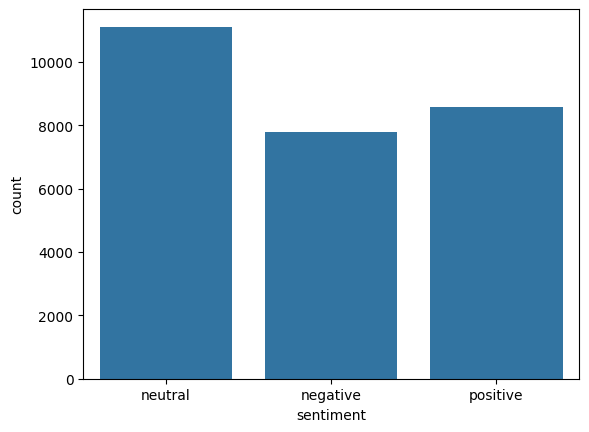

In [ ]:
sns.countplot(x = 'sentiment', data = df)
plt.show()

In [ ]:
df.shape

(27481, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


In [ ]:
text_length_list = []
for i in range(len(df)):
    if isinstance(df['text'].iloc[i], float) == True:
        print(df['text'].iloc[i])

nan


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27480 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27480 non-null  object
dtypes: object(3)
memory usage: 858.8+ KB


In [ ]:
df['text_length'] = df['text'].apply(lambda x: len(x))
df.head()

,textID,text,sentiment,text_length
0,cb774db0d1,"I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46
2,088c60f138,my boss is bullying me...,negative,25
3,9642c003ef,what interview! leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75


In [ ]:
df['text_words'] = df['text'].apply(lambda x: len(x.split()))
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [ ]:
## Taking separate dataframes for different values such as positive, negative and neutral reviews respectively.

positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']
neutral_df = df[df['sentiment'] == 'neutral']
print("The shape of the dataframe that contains only the positive reviews is: {}".format(positive_df.shape))
print("The shape of the dataframe that contains only the negative reviews is: {}".format(negative_df.shape))
print("The shape of the dataframe that contains only the neutral reviews is:  {}".format(neutral_df.shape))

The shape of the dataframe that contains only the positive reviews is: (8582, 5)
The shape of the dataframe that contains only the negative reviews is: (7781, 5)
The shape of the dataframe that contains only the neutral reviews is:  (11117, 5)


In [ ]:
wordcloud = WordCloud(width = 500, height = 500)
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [ ]:
positive_df.head()

,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


In [ ]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
positive_text = []
for i in range(len(positive_df)):
    positive_text.append(positive_df['text'].iloc[i])
positive_text[:5]

['2am feedings for the baby are fun when he is all smiles and coos',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 'I really really like the song Love Story by Taylor Swift',
 'Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet',
 'the free fillin` app on my ipod is fun, im addicted']

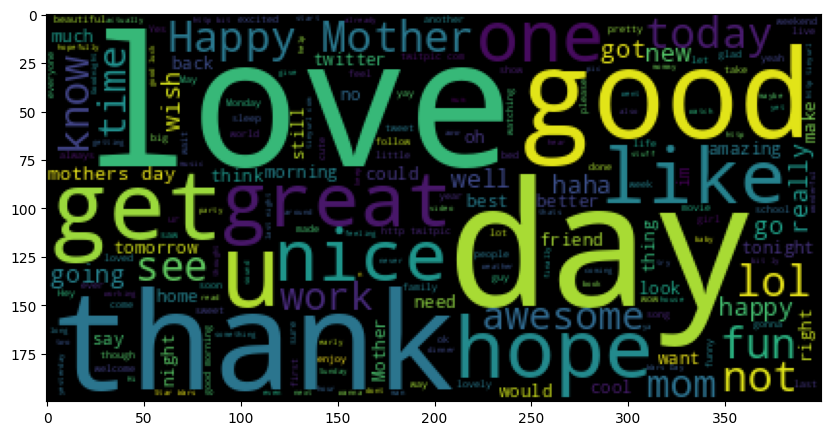

In [ ]:
wordcloud = WordCloud(stopwords = stopwords)
wordcloud.generate(''.join(positive_text))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

In [ ]:
negative_text = []
for i in range(len(negative_df)):
    negative_text.append(negative_df['text'].iloc[i])
negative_text[0: 5]

[' Sooo SAD I will miss you here in San Diego!!!',
 'my boss is bullying me...',
 ' what interview! leave me alone',
 ' Sons of ****, why couldn`t they put them on the releases we already bought',
 'My Sharpie is running DANGERously low on ink']

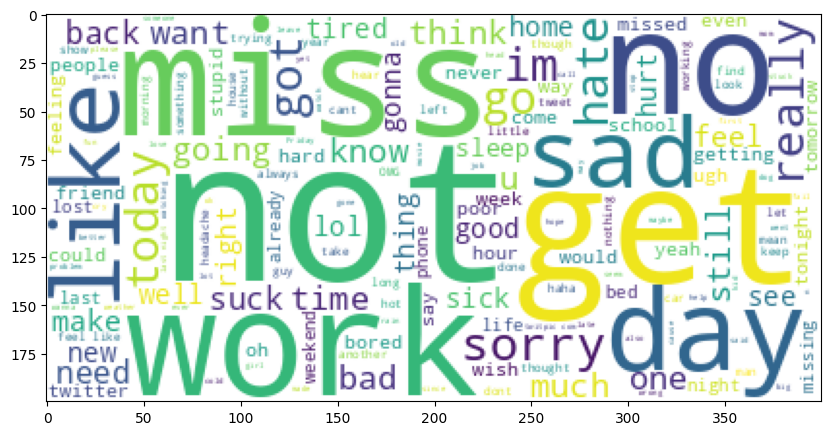

In [ ]:
wordcloud = WordCloud(stopwords = stopwords, background_color = 'white')
wordcloud.generate(''.join(negative_text))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

In [ ]:
df.drop(['textID'], axis = 1, inplace = True)
df.head()

,text,sentiment,text_length,text_words
0,"I`d have responded, if I were going",neutral,36,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,my boss is bullying me...,negative,25,5
3,what interview! leave me alone,negative,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [ ]:
X = df.drop(['sentiment'], axis = 1)
y = df['sentiment']

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 50)
X_train.shape

(19236, 3)

In [ ]:
X_cv.shape

(8244, 3)

In [ ]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
!pip install tqdm

In [ ]:
# Combining all the above stundents
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentence in tqdm(X_train['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████| 19236/19236 [00:01<00:00, 17250.97it/s]


In [ ]:
preprocessed_text[0: 5]

['24 hours since dog put sleep rip old friend',
 'not feeling comfortable today',
 'hurray twin girls born beautiful may day',
 'bah h8 waking',
 'textmate crashed first time 3 months not bad actually textmate']

In [ ]:
for i in range(len(X_train)):
    X_train['text'].iloc[i] = preprocessed_text[i]
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [ ]:
# Combining all the above stundents
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentence in tqdm(X_cv['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████| 8244/8244 [00:00<00:00, 10330.28it/s]


In [ ]:
for i in range(len(X_cv)):
    X_cv['text'].iloc[i] = preprocessed_text[i]
X_cv.head()

,text,text_length,text_words
7214,mom happy present yayy,38,8
19840,no surprise probably know,67,11
19409,nope difference 5 omr c class anyone notice fl...,102,19
6600,smells badly garlic,25,5
7807,friday whole different meaning work saturday s...,78,14


In [ ]:
binarizer = LabelBinarizer()
y_train_converted = binarizer.fit_transform(y_train)
binarizer = LabelBinarizer()
y_cv_converted = binarizer.fit_transform(y_cv)
y_cv_converted

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [ ]:
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train['text'])
X_cv_text = vectorizer.transform(X_cv['text'])
X_train_text.shape

(19236, 20619)

In [ ]:

X_train_text[0: 5]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 31 stored elements and shape (5, 20619)>

In [ ]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (20619,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
to_categorical(np.arange(1, 10))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
y_train

,sentiment
19832,negative
10340,negative
11044,positive
14088,negative
20333,neutral
...,...
15650,positive
22638,positive
10124,positive
5601,positive


In [ ]:
encoder = LabelEncoder()
y_train_converted = encoder.fit_transform(y_train)
y_train_converted

array([0, 0, 2, ..., 2, 2, 0])

In [ ]:
y_train_final = to_categorical(y_train_converted)
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [ ]:

X_train_dropped = X_train.drop(['text'], axis = 1)
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [ ]:
X_train['text'].head()

,text
19832,24 hours since dog put sleep rip old friend
10340,not feeling comfortable today
11044,hurray twin girls born beautiful may day
14088,bah h8 waking
20333,textmate crashed first time 3 months not bad a...


In [ ]:
X_train_dropped = X_train.drop(['text'], axis = 1)
X_train_dropped.head()

,text_length,text_words
19832,78,18
10340,41,6
11044,48,9
14088,19,5
20333,80,14


In [ ]:
X_cv_dropped = X_cv.drop(['text'], axis = 1)
X_cv_dropped.head()

,text_length,text_words
7214,38,8
19840,67,11
19409,102,19
6600,25,5
7807,78,14


In [ ]:
scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_train_dropped)
X_cv_final = scaler.transform(X_cv_dropped)
X_train_final[0: 5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [ ]:
X_cv_final[0: 5]

array([[0.25362319, 0.22580645],
       [0.46376812, 0.32258065],
       [0.7173913 , 0.58064516],
       [0.15942029, 0.12903226],
       [0.54347826, 0.41935484]])

In [ ]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

encoder = LabelEncoder()
y_cv_encoded = encoder.fit_transform(y_cv)
y_train_final = to_categorical(y_train_encoded)
y_cv_final = to_categorical(y_cv_encoded)
y_train_final[0: 5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:

y_cv_final[0: 5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:

X_train_final[0: 5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [ ]:
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [ ]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
X_cv_vectorized = vectorizer.transform(X_cv['text'])
X_train_vectorized

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 135844 stored elements and shape (19236, 20619)>

In [ ]:
X_train_final[0: 5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [ ]:
X_train_bow_toarray = X_train_vectorized.toarray()
X_cv_bow_toarray = X_cv_vectorized.toarray()
X_train_new = np.concatenate((X_train_bow_toarray, X_train_final), axis = 1)
X_cv_new = np.concatenate((X_cv_bow_toarray, X_cv_final), axis = 1)

In [ ]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [ ]:
model.fit(X_train_new, y_train_final, epochs = 10, validation_data = (X_cv_new, y_cv_final))

Epoch 1/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.4807 - loss: 1.0150 - val_accuracy: 0.6771 - val_loss: 0.7701
Epoch 2/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.6997 - loss: 0.7108 - val_accuracy: 0.6955 - val_loss: 0.7228
Epoch 3/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.7882 - loss: 0.5309 - val_accuracy: 0.6889 - val_loss: 0.7570
Epoch 4/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8488 - loss: 0.4055 - val_accuracy: 0.6838 - val_loss: 0.8627
Epoch 5/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.8980 - loss: 0.3126 - val_accuracy: 0.6812 - val_loss: 0.9573
Epoch 6/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9184 - loss: 0.2614 - val_accuracy: 0.6779 - val_loss: 1.1273
Epoch 7/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9363 - loss: 0.1989 - val_accuracy: 0.6775 - val_loss: 1.2816
Epoch 8/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.9488 - loss: 0.1645 - 

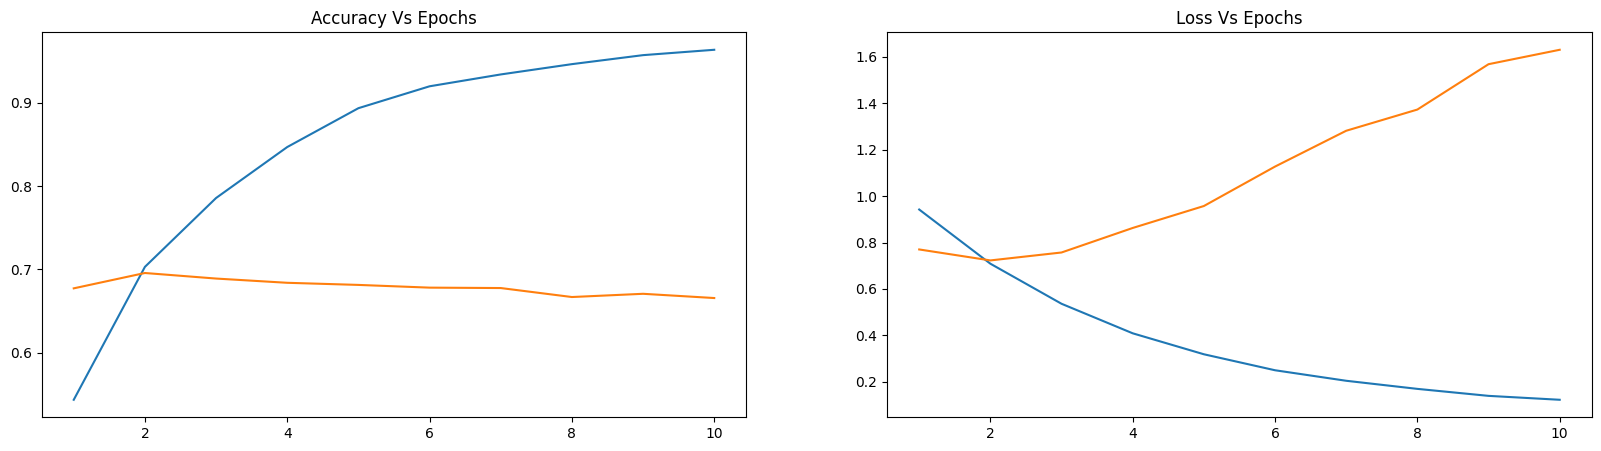

In [ ]:
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = np.arange(1, 11)
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

sns.lineplot(x = epochs, y = accuracy, ax = ax[0])
sns.lineplot(x = epochs, y = val_accuracy, ax = ax[0])
ax[0].set_title('Accuracy Vs Epochs')
sns.lineplot(x = epochs, y = loss, ax = ax[1])
sns.lineplot(x = epochs, y = val_loss, ax = ax[1])
ax[1].set_title('Loss Vs Epochs')
plt.show()

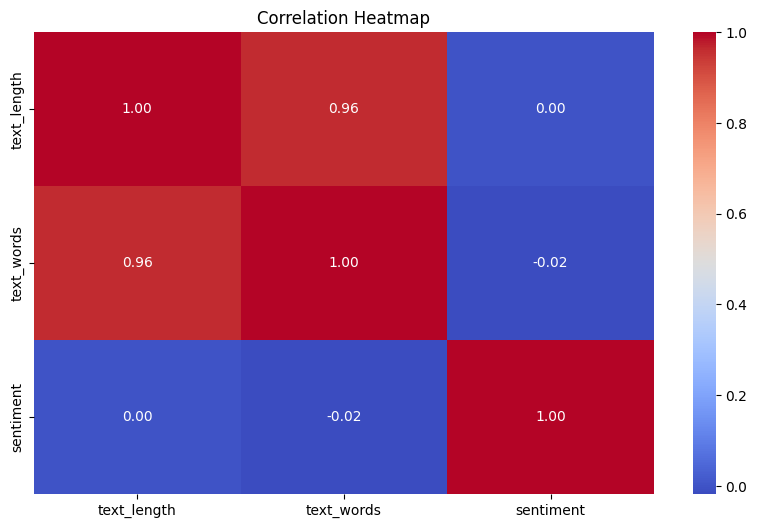

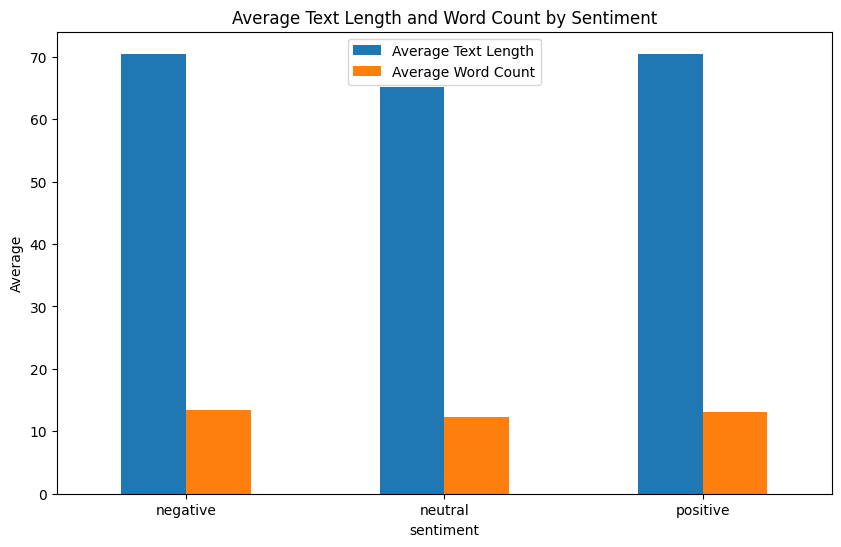

In [ ]:
# After the existing code, add the following:

# 1. Heatmap of Correlation
plt.figure(figsize=(10, 6))
correlation_matrix = df[['text_length', 'text_words', 'sentiment']].copy()
correlation_matrix['sentiment'] = LabelEncoder().fit_transform(correlation_matrix['sentiment'])  # Encode sentiment
correlation = correlation_matrix.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 2. Bar Chart for Average Text Length and Word Count by Sentiment
avg_text_length = df.groupby('sentiment')['text_length'].mean()
avg_text_words = df.groupby('sentiment')['text_words'].mean()

# Create a DataFrame for plotting
avg_df = pd.DataFrame({
    'Average Text Length': avg_text_length,
    'Average Word Count': avg_text_words
})

# Plotting the bar chart
avg_df.plot(kind='bar', figsize=(10, 6))
plt.title('Average Text Length and Word Count by Sentiment')
plt.ylabel('Average')
plt.xticks(rotation=0)
plt.show()

In [ ]:
def preprocess_new_text(text, stopwords):
    import re

    # Expand contractions
    def decontracted(phrase):
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        return phrase

    # Apply preprocessing
    text = decontracted(text)
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    text = ' '.join(e for e in text.split() if e.lower() not in stopwords)
    return text.lower().strip()

def predict_sentiment(input_text):
    # Preprocess
    processed_text = preprocess_new_text(input_text, stopwords)

    # Vectorize
    text_vector = vectorizer.transform([processed_text])

    # Additional features
    text_length = len(input_text)
    word_count = len(input_text.split())
    extra_features = np.array([[text_length, word_count]])
    extra_features_scaled = scaler.transform(extra_features)

    # Combine with BoW
    combined_input = np.concatenate((text_vector.toarray(), extra_features_scaled), axis=1)

    # Predict
    prediction = model.predict(combined_input)
    sentiment_classes = encoder.classes_  # ['negative', 'neutral', 'positive']
    predicted_class = sentiment_classes[np.argmax(prediction)]

    return predicted_class


In [ ]:
text_input = "I love this product! It's amazing."
print("Predicted Sentiment:", predict_sentiment(text_input))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Predicted Sentiment: positive
